

# Assignment explain numpy.random package

![numpylogo](img/numpy.jpeg)



## Why are random numbers needed? 

The ability to generate random numbers has many useful applications. Say a researcher is interested in the effectiveness of a new ulcer drug. The population of interest is every person with ulcers. It would impractically costly and time-consuming contact everyone with ulcers, give them the drug and then compare before and after reports. Indeed, the population of people with ulcers as a total population would be impossible to judge as many people may have ulcers without ever seeking treatment.

## Why take samples?
The researcher needs to take a sample from this population. This sample should be big enough and diverse enough so that it fairly represents the wider population. The sample data is used to make **generalisations** about its population. For example, the drug’s effectiveness in a sample containing only men with ulcers aged seventy or over is unlikely to represent its effectiveness on women half that age. Sampling involves taking a sufficiently sized subset of a given population that accurately reflects the phenomena under investigation so that information from the sample can be used to infer things from the overall population. It is vital then that *the sample shares the same characteristics as its target population*. 

## Problems with picking samples 
Picking samples that represent a population is prone to **biases**. For example, if asked to pick a number at random between 1 and 10 there will be far more 3's and 7's than would be expected if the choice was truly random [ref](https://micro.magnet.fsu.edu/creatures/pages/random.html).

One way to reduce sampling bias is to use **random sampling**. Random sampling means that every item in the target population has an *equal* chance of being selected. In the example above, the target population would be the numbers between 1 and 10 inclusive and random sampling means that each number in this interval would have an equal probability of being selected. 

If random sampling is not used then certain elements of the population are favoured over others which skews the results and limits its generalising ability. In reality, it is often difficult to define the target population and its sample precisely so that only the phenomena in question is investigated.  

![Literary Digest](img/digest.jpg)

For example in 1936 there was a phone poll conducted by The Literary Digest which predicted that the Republican Alfred Landon would win the election 57% to 43% from the Democrat F.D.Roosevelt. However, the actual results from the election was 62% in favour of FDR. The problem was sample bias. Only people with phones were polled and they were more likely to vote Republican in depression era America. People with phones were also more likely to come from a more affluent background and were not as likely to be moved by FDR’s new deal rhetoric. [Ref]( https://www.math.upenn.edu/~deturck/m170/wk4/lecture/case1.html). Random sampling does not remove sample bias but it does limit one aspect of it, biases introduced by favouring subsets of the target population rather than then every element being as likely to be selected as every other one.   

## Algorithms and random numbers

Computing algorithms are deterministic. They cannot generate true randomness without using some external piece of information. 

![lave lamps](img/lava.jpg)


For example the DNS service Cloudflare uses its lava lamps in its head office to help generate the randomness needed for its cryptography [ref]( https://blog.cloudflare.com/randomness-101-lavarand-in-production/). Many areas of science and computing do not need true randomness. In fact, some areas require predictable ‘randomness’ so that model parameters can be tested with the same random ‘noise’. Computer algorithms use **pseudo random numbers** (Idris, 2015). To all appearances these look random but if a key piece of information is known, the whole random sequence can be predicted. There are several **pseudo random number generator** (PRNG) algorithms. 

One of the most widely used PRNG is the *Mersenne Twister*. A Mersenne number is one less than a power of 2. The twister aspect refers to its period length being a Mersenne prime which is ‘twisted’ by various transformations when random numbers are generated. A commonly used Mersenne twister uses 19937 as its power.  This algorithm takes a ‘seed’ value as a starting point. This is initialised into a state and transformed via reversable and non-reversable transformations in order to generate the pseudo random numbers PRN. [Ref](https://www.cryptologie.net/article/331/how-does-the-mersennes-twister-work/). The Mersenne Twister is not secure enough for cryptology however it a useful and widely used all purpose PRNG [Ref]( https://en.wikipedia.org/wiki/Mersenne_Twister).  

## Random numbers in Python

![python logo](img/python.png)

Python has an in built random package *random*. NumPy extends this by adding extra functionality and methods in its *numpy.random* package. Both Python and Numpy.random use the Mersenne twister 19937 algorithm to generate PRNs.

## Why use NumPy for generating random numbers

Python's random method generates a random float number uniformly from the interval 0 inclusive to 1 exclusive [Ref]( https://docs.python.org/3/library/random.html). .random has many of the functions and methods contained in numpy.random so *why use numpy.random*?

The main reason numpy.random is used over Python’s random.random package is that NumPy is designed to work with n dimensional arrays. Numpy uses less memory and is faster than lists used in the default python.   NumPy is specialised for scientific operations and has more advanced mathematical functionality than Python. It is especially useful for manipulating numerical data that can be arranged in matrices [ref](https://metaspace.blog/programming/python/python-numpy-basics/). 

PRN’s can be arranged in arrays, a speciality in NumPy. Numpy.random and python’s default random.random have similar functions and methods but numpy.random has some extra probability distributions common to scientific research and some extra simple random data convenience functions.  Neither are suitable for cryptography purposes. [ref](https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python). 

The functions and methods offered in numpy.random are

* simple random data
* permutations
* distributions
* random generator

*Simple random data* section consist of several functions that generate simple random data.Inputs can be size or range. *Permutation* functions randomly shuffle or permutes a given sequence. *Distribution* functions allow specific population distributions or ranges to be sampled. This may require statistical measures such as mean and standard deviation. Numpy.random can generate samples from continuous and descrite distributins (Idris, 2015). Lastly, the *random generator* section contains functions that allow seeds to be specified (Mehta, 2015). This is useful in cases where the exact same sequence of random data is required. Each of these sections will be explored. 

 

## What does Simple random data do?


There are 10 simple random data functions in numpy.random namely

1. rand
2. randn
3. randint
4. random_integers
5. random_sample
6. random
7. randf
8. sample
9. choice
10. bytes

[ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html). Of these random, ranf and sample [](https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions)are aliases of random_sample, with similar inputs and outputs. In addition rand and randn are convenience functions, meaning that their functionality can be achived by Python's in built functions. Each of these functions are used to generate simple random data of various sizes or shapes over various intervals or ranges. Which function is used depends on the requirments. 


### Import libraries

In [1]:
#Import packages numpy and matplotlib.pyplot
import numpy as np
import random
import matplotlib.pyplot as plt
# display pyplot in jupyter notebook
%matplotlib inline

### Python's default random function

Python has the built in random function for generating simple random data.

In [2]:
r1 = random.random()
print("Simple random data from python's inbuilt random function", '\n')
print(r1, '\n')
print("Simple random data from python's inbuilt random function uniformly distriubted between 0 and 1", '\n')
r2 = random.uniform(0,1)
print(r2)

Simple random data from python's inbuilt random function 

0.7064219345416578 

Simple random data from python's inbuilt random function uniformly distriubted between 0 and 1 

0.5638634038098086


numpy.random extends this, adding extra functions and methods.[ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) 


|Simple Random Data| Input                       | Output                                                           |
| -----------------|:------------------------    | :--------------------------------------------------------------- |
| rand             | d0, d1, …, dn               | Random values in a given shape                                   |               
| randn            | d0, d1, …, dn               | sample (or samples) from the “standard normal” distribution      |              
| randint          | low`[, high, size, dtype]`  | Return random integers from low (inclusive) to high (exclusive)  |            
| random_integers  | low`[, high, size])` 	     | Random integers of type np.int between low and high, inclusive.  |
| random_sample    | `[size]`                    | Random floats in the half-open interval `[0.0, 1.0)`             |               
| random           | `[size]`                    | Random floats in the half-open interval `[0.0, 1.0)`             |               
| ranf             | `[size]`                    | Random floats in the half-open interval `[0.0, 1.0)`             |               
| sample           | `[size]`                    | Random floats in the half-open interval `[0.0, 1.0)`             |               
| choice           | `a[, size, replace, p]`     | Generates a random sample from a given 1-D array                 |                     
| bytes            | length                      | Random bytes                                                     |      

### rand

rand(d0, d1, ..., dn) outputs random values in a given shape. Shape refers to the arrangment of the arrays. eg. a input of  (1)is a single 1x1 matrix array, an input of (2,3) is  a 2x3 matrix array (number of rows x columns) while an input of (2,3,4) is 2 arrays consisting each consisting of 3x4 matrix arrays. 
rand is a convenience or helper function. It creates random values in a given shape [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html#numpy.random.rand). Inputs are non negative integers, although 0 returns an empty array.  If no input is given a single number is outputed. Output arrays come from the uniform distribution (i.e. each number has the same probability of being selected) between 0 inclusive and 1 exclusive `[0, 1)` 

#### When would you use rand?
Use rand if you want to generate random values from a uniform semi closed interval `[0,1)` to populate matrices (rows by columns) of a given size; note single floats can be generated with empty parameters and single element arrays can be generated with argument 1. It is similar to Python's random.random but extends the input to accept different array sizes [ref](https://docs.python.org/3/library/random.html).




In [3]:
print("Generate a 2x4 matrix and fill it with random numbers", "\n")
print(np.random.rand(2,4), "\n")
print("Generate a single float", "\n")
print(np.random.rand(),"\n")
print("Generate a 1-d matrix", "\n")
print(np.random.rand(1),"\n")


Generate a 2x4 matrix and fill it with random numbers 

[[ 0.92752452  0.52251454  0.24198961  0.11161688]
 [ 0.34764152  0.72244792  0.94016248  0.57662947]] 

Generate a single float 

0.29404572839065346 

Generate a 1-d matrix 

[ 0.06774933] 



### randn

randn((d0, d1, ..., dn) outputs a sample(s) from the “standard normal” distribution N(0,1).
Randn is similar to rand but takes its random numbers from the standard normal distrubution with mean 0 and standard deviation 1 N(0,1)[ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html#numpy.random.randn). It is similar to the standard_normal distrubution in NumPy.random however standard_normal can have tuples as arguments. Randn's arguements must be positive integers or integer like (such as int(1.02)). Like rand, it is a convenience function with inputs for sizes. If no input given a single random number (float) from the standard normal distribution is outputted. Outputs take the form of n dimentional arrays in the shape specifed by the inputs. If a non standard normal distribution N(m,sd<sup>2</sup>) is required, the transformation m + sd * np.random.rand() can be applied. 

#### When would you use randn?
Use randn If you want to generate random values in a specified shape with values taken from the standard normal distrubution centered in a bell curve round 0 with most values falling between -3 and 3. Unlike rand - negative values can be returned. 

In [4]:
print("No input given  - single random float returned", "\n")
print(np.random.randn(), "\n")

print("1 input given  - single random array from N(0,1)","\n")
print(np.random.randn(1),'\n')

print("5 outputs a 1x1 array of 5 random floats from N(0,1)","\n")
print(np.random.randn(5),'\n')

print("outputs 2 arrays of 3x4 matrices filled with random numbers from N(0,1)","\n")
print(np.random.randn(2,3,4),'\n')


No input given  - single random float returned 

0.09906374539328987 

1 input given  - single random array from N(0,1) 

[-0.69477924] 

5 outputs a 1x1 array of 5 random floats from N(0,1) 

[-0.64180709 -1.32580718 -1.19615366 -0.26332225  0.56908839] 

outputs 2 arrays of 3x4 matrices filled with random numbers from N(0,1) 

[[[-0.02970592  0.6975422   0.31071076 -0.62474945]
  [-2.07720976 -0.26789958  0.24317213  1.05658989]
  [-0.0732887  -0.15008823 -0.77308912 -0.29597316]]

 [[-1.57666167 -0.37931577  1.78138557 -0.2192054 ]
  [ 1.7504563   0.86636542 -1.04098072  1.78363144]
  [ 0.24266041 -0.85160341  0.21627602 -0.04326565]]] 



To see the shape of the distribution plot a histogram. This is the standard normal distrubution around 0 with standard deviation 1.  

(array([ 1009.,   939.,  1024.,   986.,  1006.,   998.,   976.,  1019.,
         1046.,   997.]),
 array([  2.48977300e-05,   1.00010835e-01,   1.99996773e-01,
          2.99982710e-01,   3.99968648e-01,   4.99954585e-01,
          5.99940523e-01,   6.99926460e-01,   7.99912398e-01,
          8.99898335e-01,   9.99884273e-01]),
 <a list of 10 Patch objects>)

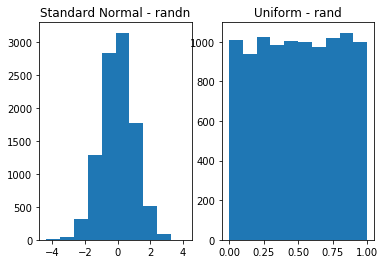

In [5]:
plt.subplot(1,2,1)
x = np.random.randn(10000)
plt.title("Standard Normal - randn")
plt.hist(x)
plt.subplot(1,2,2)
x = np.random.rand(10000)
plt.title("Uniform - rand")
plt.hist(x)

To shift the distribution from standard normal  to n N(m,sd<sup>2</sup>) use the transformation m + sd * np.random.rand()

outputs random numbers from N(2, 9) 

this shifts the plot left to centre it round 2 with a spread of 9


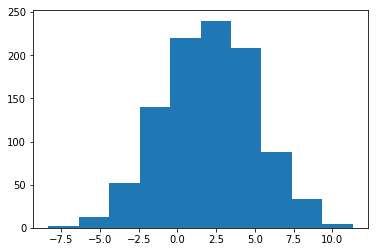

In [6]:
print("outputs random numbers from N(2, 9)","\n")
plt.hist(2+3*np.random.randn(1000))
print("this shifts the plot left to centre it round 2 with a spread of 9")

### randint

randint((low`[, high, size, dtype]`))outputs random integers from low (inclusive) to high (exclusive). 
randint is differs from the two above functions in that it returns integers within a specifeid interval low (inclusive) to high (exclusive). Integers are returned from the discrete uniform distribution [ref](). Whereas rand returned numbers from the continous uniform distribution between `[0,1)`. Randint expands this interval by returing values from `[low,high)`. If no arguments are given an error is returned. If one argument is given, say h then this is assumed to be the higher bound and positive and the lower bound is 0 `[0, h)`.  Size can also be specified e.g. if 10 random numbers are required between `[0, 5)` the arguments would be (0,5,10). Data type can also be specified, the default is np.int. dTypes relate to the way memory blocks are interpreted [ref](https://stackoverflow.com/questions/9457037/what-does-dtype-do).   

#### When would you use randint?
randint would be used when integers rather than floats are required and the integers lie within a certain range. e.g. generate a random number between 1 and 10 inclusive

In [7]:
print("Generate a random number between 1 and 10 inclusive","\n")
print(np.random.randint(1, 11),"\n")

print("Generate 3 random number between 1 and 10 inclusive","\n")
print(np.random.randint(1, 11, 3),"\n")

print("Generate a random positive number less than 4","\n")
print(np.random.randint(4),"\n")

print("Generate a random integer between -5 and 5 inclusive ","\n")
print(np.random.randint(-5, 6),"\n")

Generate a random number between 1 and 10 inclusive 

6 

Generate 3 random number between 1 and 10 inclusive 

[2 2 6] 

Generate a random positive number less than 4 

2 

Generate a random integer between -5 and 5 inclusive  

2 



### random_integers

random_integers(low`[, high, size]`) outputs random integers of type np.int between low and high, inclusive. Size refers to the number of random values required from the specified interval. This function is no longer maintained. 

Random_integers is very similar to randint, both return integers from a discrete uniform distribution. However random_integers is inclusive of the higher range value `[low, high]`. This function is deprecated i.e replaced, in favour of randint. Thus when called by python a warning will display, although the function will still work. Both randint and random_integers can use the transformation  a + (b - a) * (np.random.random_integers(N) - 1) / (N - 1) to give N evenly spaced integers between a and b but random_integers includes the b value whereas randind does not.

#### When would you use random_integers?
You wouldn't. The function is retired in favour of randint which was discussed above. It will still work but python will give a warning when its used.  

In [8]:
print("Output 10 1's or 0's randomly", "\n")
print(np.random.random_integers(0,1, 10), '\n')


Output 10 1's or 0's randomly 

[1 0 0 1 1 0 0 0 1 1] 



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  


To specify intervals equally spaced..... ## add stuff here

a,b,N=3,5,10
print(a + (b - a) * (np.random.random_integers(N) - 1) / (N - 1), '\n')
print(a + (b - a) * (np.random.randint(N) - 1) / (N - 1))

### random_sample (random, ranf and sample)

random_sample(`[size]`) outputs random floats in the half-open interval `[0.0, 1.0)` [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).
Random_sample and its aliases [ref](https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions) random [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random.html#numpy.random.random), ranf [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.ranf.html#numpy.random.ranf) and sample [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.sample.html#numpy.random.sample) . unlike randint which returned random values from the descrite uniform distribution `[low, high)` and rand which populates arrays with random values in a given shape, random_sample returns random floats from the continous uniform distrubtion `[0,1)`. It's input is size i.e. the number of random values required. To expand values outside of U`[0,1)` to cover U`[a, b)` the transformation a +  (b - a)`*` random_sample() can be used. the size can be an integer or tuples of integers (a,b,c) 

#### When would you use random_sample or its aliases?
random_sample is used when random floats are required from the continous uniform distrubution in the interval 0 inclusive to 1 exclusive. Each number is as likey to be generated as every other. A single number can be returned E.g. pick any number in the interval `[0,1)` or an array of a specified size e.g. pick 20 numbers in the interval `[0, 1)` 

In [9]:
print("generate a random float in [0,1)", "\n")
print(np.random.random_sample(), "\n")

print("generate a random float in [0,1)", "\n")
print(np.random.random_sample(20), "\n")



generate a random float in [0,1) 

0.14355503496027655 

generate a random float in [0,1) 

[ 0.68354778  0.75384246  0.98574133  0.24119489  0.65977392  0.60456654
  0.34297129  0.94008481  0.54121455  0.10802449  0.98324598  0.78552707
  0.12617739  0.11091124  0.40085588  0.56392159  0.9565985   0.96918568
  0.55785935  0.29661557] 



The histogram of random_sample shows its uniform distrubution 



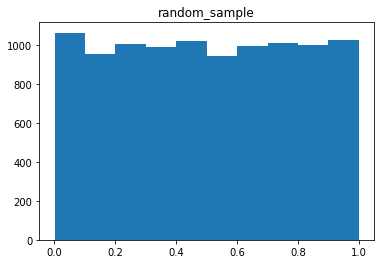

The aliases show a similar pattern 



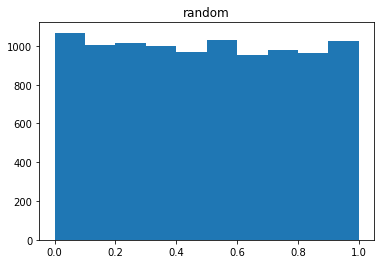

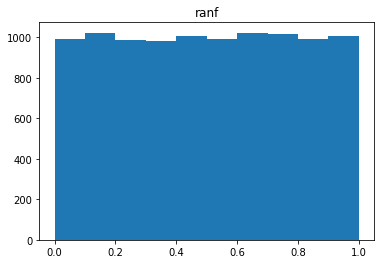

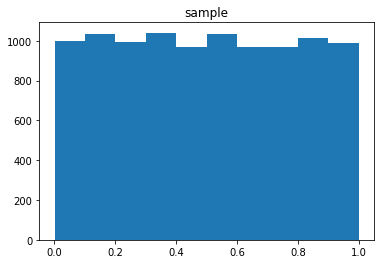

In [10]:
print("The histogram of random_sample shows its uniform distrubution", "\n")
plt.hist(np.random.random_sample(10000))
plt.title("random_sample")
plt.show()
print("The aliases show a similar pattern", "\n")
plt.hist(np.random.random(10000))
plt.title("random")
plt.show()
plt.hist(np.random.ranf(10000))
plt.title("ranf")
plt.show()
plt.hist(np.random.sample(10000))
plt.title("sample")
plt.show()



To change the interval `U[0, 1)` from which the numbers are selected to `U[a,b)` from use the transformation a + (b - a)* random_sample()



This outputs an 1x10 array filled with random floats between [3, 5) 

[ 4.27377964  4.72710216  3.62504492  4.76410523  3.86803932  4.69331382
  3.23495411  4.99380886  3.17525506  3.05940059] 



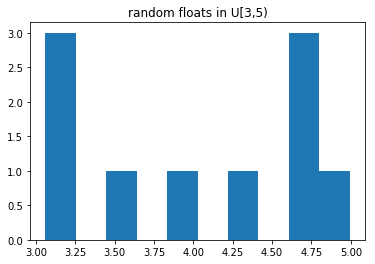

In [11]:
print("This outputs an 1x10 array filled with random floats between [3, 5)", "\n")
a,b,N=3,5,10
x = a + (b - a) * np.random.random_sample(10) 
print(x, "\n")
plt.hist(x)
plt.title("random floats in U[3,5)")
plt.show()



### choice

choice(a`[, size, replace, p]`) outputs a random sample from a given 1-D array [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html). its input is a 1 dimentional array or integer. The number of random values required can be specified by size. The difference between this function and the ones above is that here the population is specified in an array and the function returns one of these choices randomly. e.g. an input of all the harry potter book titles would randomly return one book from this population. The probability p of elements in the 1 d array can be specified (probabilities total to 1). If p is not provided then p is assumed to be uniformly distruibuted across the array. Size refers to the number of random elements from the population that are returned. There is also the option to replace which defaults to true. This refers to whether or not the random choice element is returned to the sample population and is used when unique values from the population are needed [ref](https://stackoverflow.com/questions/40689152/what-does-replacement-mean-in-numpy-random-choice). 


#### When would you use choice?
choice is used when you want to generate a random choice from a fixed sample, you can specify if you want the choise to be returned to the selection pool or not. For example pick one Harry Potter book from a pool of all Harry potter books.


In [12]:
print("List all Harry Potter books", "\n")
hp = ['Harry Potter and the Philosopher’s Stone', 'Harry Potter and the Chamber of Secrets', 'Harry Potter and the Prisoner of Azkaban', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Order of the Phoenix', 'Harry Potter and the Half-Blood Prince', 'Harry Potter and the Deathly Hallows']
for book in hp:
    print(book)
print("\n")
print("pick one at random", "\n")
print(np.random.choice(hp, 1), '\n')#  books can be repeatedly returned

print("pick 5 books at random and remove it from the pool when picked  - only unique books will be returned for each choice", "\n")
print(np.random.choice(hp, 5, replace=False), '\n')
# only unique books are returned
print("pick 5 books at random and keep it in the pool when picked  - choices may be repeated", "\n")
print(np.random.choice(hp, 5, replace=True), '\n')
print("Choices can be weighted to make them more or less likely", "\n")
print("Here, Chamber of secrets more likely to be selected", "\n")
print(np.random.choice(hp, 5, p=[0.2,0.5,0.1,0.1,0.015,0.03,0.055], replace=True), '\n')


List all Harry Potter books 

Harry Potter and the Philosopher’s Stone
Harry Potter and the Chamber of Secrets
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire
Harry Potter and the Order of the Phoenix
Harry Potter and the Half-Blood Prince
Harry Potter and the Deathly Hallows


pick one at random 

['Harry Potter and the Prisoner of Azkaban'] 

pick 5 books at random and remove it from the pool when picked  - only unique books will be returned for each choice 

['Harry Potter and the Order of the Phoenix'
 'Harry Potter and the Chamber of Secrets'
 'Harry Potter and the Goblet of Fire'
 'Harry Potter and the Prisoner of Azkaban'
 'Harry Potter and the Philosopher’s Stone'] 

pick 5 books at random and keep it in the pool when picked  - choices may be repeated 

['Harry Potter and the Chamber of Secrets'
 'Harry Potter and the Order of the Phoenix'
 'Harry Potter and the Prisoner of Azkaban'
 'Harry Potter and the Half-Blood Prince'
 'Harry Potter and the Ph

### bytes

bytes(length)outputs random bytes of the specified length size [Ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html). 

bytes takes non negative integer inputs and outputs randomly byte strings. outputs are prefixed with b and the bytes are enclosed within apostrophies or quotation marks, hence outputs are strings of specified length [Ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.bytes.html#numpy.random.bytes). The b at the start indicates that it is a byte literal [why the b at the front](https://stackoverflow.com/questions/6269765/what-does-the-b-character-do-in-front-of-a-string-literal)

#### When would you use bytes
bytes would be used when you want to generate random byte strings

In [13]:
print(np.random.bytes(0),'\n')
print(np.random.bytes(1),'\n')
print(np.random.bytes(10),'\n')

b'' 

b'\x8e' 

b'tF\x0c\x84\n\xbc\x1ezT&' 



Hence *Simple Random Data* contains functions for generating random elements consisting of integers, arrays, sizes and shapes from continous or discrete uniform populations or normally distributed populations that may or may not be probabilistically weighted towards some values depending on what is required. It also contains functions to randomly pick elements from a given population array such as a list or set of bytes. The next section of numpy.random to be discussed is its permutation functions. 

## What does permutations do?
![permutation](img/perm.png)

A permutation is a way of cycling through all options in a given set. For example chosing unique pairs of 3 numbers (1,2 and 3)would give 3<sup>2</sup> combinations namely (1,1)(1,2)(1,3)(2,1)(2,2)(2,3)(3,1) (3,2) (3,3). Numpy.random has two permutation functions namely [Ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html), 
- shuffle
- permutation

The functions in this section are ways of randomly selecting elements from a finite set.

### shuffle
shuffle(x) takes an array or array like input and randomly reorders elements in the array. E.g. randomly shuffling the order of harry potter books

#### When would you use shuffle?
shuffle is used when you have an array i.e. a finite list of elements and you want to randomly shuffle them. The same list is returned but the order items are presented in has changed. 

In [14]:
hp = ['Harry Potter and the Philosopher’s Stone', 'Harry Potter and the Chamber of Secrets', 'Harry Potter and the Prisoner of Azkaban', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Order of the Phoenix', 'Harry Potter and the Half-Blood Prince', 'Harry Potter and the Deathly Hallows']
print("Harry Potter books listed in order of publication date", "\n")
for book in hp:
    print(book)
print("\n")    
# shuffle the books
print("Harry Potter books listed in shuffled order", "\n")
np.random.shuffle(hp)

hp


Harry Potter books listed in order of publication date 

Harry Potter and the Philosopher’s Stone
Harry Potter and the Chamber of Secrets
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire
Harry Potter and the Order of the Phoenix
Harry Potter and the Half-Blood Prince
Harry Potter and the Deathly Hallows


Harry Potter books listed in shuffled order 



['Harry Potter and the Deathly Hallows',
 'Harry Potter and the Philosopher’s Stone',
 'Harry Potter and the Goblet of Fire',
 'Harry Potter and the Half-Blood Prince',
 'Harry Potter and the Order of the Phoenix',
 'Harry Potter and the Chamber of Secrets',
 'Harry Potter and the Prisoner of Azkaban']

You can shuffle a deck of cards and deal 5 [ref](https://www.programiz.com/python-programming/examples/shuffle-card)

In [15]:
# Python program to shuffle a deck of card using the module random and draw 5 cards
# code adapted from https://www.programiz.com/python-programming/examples/shuffle-card

# import modules
import itertools

# make a deck of cards
deck = list(itertools.product(range(1,14),['Spade','Heart','Diamond','Club']))

# shuffle the cards
np.random.shuffle(deck)

# draw five cards
print("Your cards are", "\n")
for i in range(5):
   print(deck[i][0], "of", deck[i][1])

Your cards are 

9 of Club
10 of Heart
2 of Spade
6 of Club
8 of Diamond


### Permutation

permutation(x) has an array as an input and randomly permutates/shuffles outputs. 

Randomly permute a sequence, or return a permuted range [Ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html). Unlike shuffle which reorders the original array, permutation takes a copy of the original array and shuffles the copy. The original array remains intact. In addition permutation can take integer inputs and will output a range e.g an input of 5 will output a random range populated with unique elements from 0 to 4 inclusive. [Ref](https://stackoverflow.com/questions/15474159/shuffle-vs-permute-numpy)

#### When would you use permutation?
permutation is used when you want to shuffle your array but you also want to keep a record of your unshuffled array.


In [16]:
print("Harry Potter books listed in order of publication date", '\n')

hp = ['Harry Potter and the Philosopher’s Stone', 'Harry Potter and the Chamber of Secrets', 'Harry Potter and the Prisoner of Azkaban', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Order of the Phoenix', 'Harry Potter and the Half-Blood Prince', 'Harry Potter and the Deathly Hallows']
for book in hp:
    print(book)
print('\n')
print("books are shuffled using the permutation function","\n")
print(np.random.permutation(hp), "\n")
print("the original book order is preserved", "\n")
for book in hp:
    print(book)
print("\n")  
print("unlike shuffling with the shuffle function", "\n")
np.random.shuffle(hp)
for book in hp:
    print(book)
#print('\n')
## input is an integer output is a range
#print(np.random.permutation(5), '\n')

Harry Potter books listed in order of publication date 

Harry Potter and the Philosopher’s Stone
Harry Potter and the Chamber of Secrets
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire
Harry Potter and the Order of the Phoenix
Harry Potter and the Half-Blood Prince
Harry Potter and the Deathly Hallows


books are shuffled using the permutation function 

['Harry Potter and the Order of the Phoenix'
 'Harry Potter and the Goblet of Fire'
 'Harry Potter and the Chamber of Secrets'
 'Harry Potter and the Half-Blood Prince'
 'Harry Potter and the Deathly Hallows'
 'Harry Potter and the Prisoner of Azkaban'
 'Harry Potter and the Philosopher’s Stone'] 

the original book order is preserved 

Harry Potter and the Philosopher’s Stone
Harry Potter and the Chamber of Secrets
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire
Harry Potter and the Order of the Phoenix
Harry Potter and the Half-Blood Prince
Harry Potter and the Deathly Hallow

## What are distributions and why do we need them.


A probability distribution is a table or an equation that links each outcome of a statistical experiment with its probability of occurring. Consider tossing a coin. It has two possible outcomes, heads or tails. Here the event is the coin toss and the outcome is the result, heads or tails. Similarly throwing a dice has 6 outcomes, 1, 2, 3, 4, 5 or 6 being the face up side. imes. Outcomes of a statistical test often show a pattern based on the probibility of an event occuring. For example rolling a fair 6 faced dice will produce each of the numbers 1 to 6 roughly 1/6 of the time. Similarly tossing a non biased coin enough times will show a probability of 1/2 for both heads and tails. In each of these senarios performing the test of throwing the dice or tossing a coin, will better match its underlying probability as the number of trials or trys increases.

![dice](img/die.jpg)


Rolling a dice 10  times may give a pattern of 1,3,5,1,4,4. In this outcome, the probability of getting a 4 is 2/10 or 1/5 (two 4's from 10 throws). This is greater than the underlying probabiligy of 1/6 but the law of large numbers states [ref](https://stattrek.com/statistics/dictionary.aspx?definition=law_of_large_numbers) that the more times an event is tested, or the larger the sample size is, the closer it will be to its underlying probability of that event occuring. Rolling  the dice 10 times and getting two four's may have a probability not equal to 1/6 but if the dice is rolled a very large number of  times, the small deviations from 1/6 will be smoothed out and the underlying probibiliy will be constant at probability p = 1/6. This is the idea behind probibility distributions, they are equations that plot the underlying model when sample size reaches the same size as its total population.

When a random sample is generated it produces a specific outcome from a list of all possible outcomes. For example tossing a coin (performing the trial or test) could produce an outcome of heads or tails. Performing this test will produce only one of these outcomes, its either heads or its tails. When the list of possible outcomes (heads or tails) is plotted against its probablity of occuring (1/2)you get a probability distribution. The code below simulates 10, 100, 1000 and `1000000` random rolls of a dice and calculates the probibility of each outcome.  As the sample size increases, the sample probibility tends towards the actual probility of the distribution. 


In [17]:
print("Sample Size is 10")
size=10
outcome = np.bincount(np.random.randint(1,7,size))
print(outcome)
p1=outcome[1]/size
print("sample prob of getting 1",p1)
p2=outcome[2]/size
print("sample prob of getting 2",p2)
p3=outcome[3]/size
print("sample prob of getting 3",p3)
p4=outcome[4]/size
print("sample prob of getting 4",p4)
p5=outcome[5]/size
print("sample prob of getting 5",p5)
p6=outcome[6]/size
print("sample prob of getting 6",p6)
p = 1/6
print("actual probability",f"{p:.3}", "\n")

print("Sample Size is 100")
size=100
outcome = np.bincount(np.random.randint(1,7,size))
print(outcome)
p1=outcome[1]/size
print("sample prob of getting 1",p1)
p2=outcome[2]/size
print("sample prob of getting 2",p2)
p3=outcome[3]/size
print("sample prob of getting 3",p3)
p4=outcome[4]/size
print("sample prob of getting 4",p4)
p5=outcome[5]/size
print("sample prob of getting 5",p5)
p6=outcome[6]/size
print("sample prob of getting 6",p6)
p = 1/6
print("actual probability",f"{p:.3}", "\n")
print("Sample Size is 1000")
size=1000
outcome = np.bincount(np.random.randint(1,7,size))
print(outcome)
p1=outcome[1]/size
print("sample prob of getting 1",p1)
p2=outcome[2]/size
print("sample prob of getting 2",p2)
p3=outcome[3]/size
print("sample prob of getting 3",p3)
p4=outcome[4]/size
print("sample prob of getting 4",p4)
p5=outcome[5]/size
print("sample prob of getting 5",p5)
p6=outcome[6]/size
print("sample prob of getting 6",p6)
p = 1/6
print("actual probability",f"{p:.3}", "\n")
print("Sample Size is 1000000")
size=1000000
outcome = np.bincount(np.random.randint(1,7,size))
print(outcome)
p1=outcome[1]/size
print("sample prob of getting 1",p1)
p2=outcome[2]/size
print("sample prob of getting 2",p2)
p3=outcome[3]/size
print("sample prob of getting 3",p3)
p4=outcome[4]/size
print("sample prob of getting 4",p4)
p5=outcome[5]/size
print("sample prob of getting 5",p5)
p6=outcome[6]/size
print("sample prob of getting 6",p6)
p = 1/6
print("actual probability",f"{p:.3}", "\n")


Sample Size is 10
[0 4 0 1 1 3 1]
sample prob of getting 1 0.4
sample prob of getting 2 0.0
sample prob of getting 3 0.1
sample prob of getting 4 0.1
sample prob of getting 5 0.3
sample prob of getting 6 0.1
actual probability 0.167 

Sample Size is 100
[ 0 12 18 18 14 20 18]
sample prob of getting 1 0.12
sample prob of getting 2 0.18
sample prob of getting 3 0.18
sample prob of getting 4 0.14
sample prob of getting 5 0.2
sample prob of getting 6 0.18
actual probability 0.167 

Sample Size is 1000
[  0 142 182 196 168 166 146]
sample prob of getting 1 0.142
sample prob of getting 2 0.182
sample prob of getting 3 0.196
sample prob of getting 4 0.168
sample prob of getting 5 0.166
sample prob of getting 6 0.146
actual probability 0.167 

Sample Size is 1000000
[     0 167229 165952 166552 166336 166662 167269]
sample prob of getting 1 0.167229
sample prob of getting 2 0.165952
sample prob of getting 3 0.166552
sample prob of getting 4 0.166336
sample prob of getting 5 0.166662
sample pro

![descrite uniform distribution](img/dudist.png)

Often there is an underlying pattern based on this probability. For example in dice throw above, each outcome of getting 1, 2, 3, 4, 5 or 6  has the underlying probabiligy of 1 divided by the number of possible outcomes i.e. 6 hence p =1/6 is the same for all the outcomes. Similarly if we were to toss a coin, there would be 2 outcomes, heads or tails but the underlying distribution would be the same as in the dice throw, i.e. 1 divided by the possible outcomes, in this case 2 not 6 but its still the same for heads and tails with p = 1 divided by the number of outcomes, albeit the number of outcomes differs, 2 for the coin toss and 6 for the dice throw. This type of distribution is called a **uniform distribution**. In particular it is a descrete uniform distribution. i.e outcomes are stepped, they are either 1 or 2 or 3 etc and not midway between 2 and 3. 

NumPy.random has a descrete uniform distribution built in function. You can generate this distrubtuion by plotting the histogram of randint but an alternative way is to call the 





There are numerous probibility distributions  



Roll the dice 

1


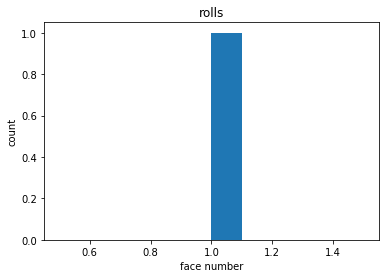

In [18]:
print("Roll the dice", "\n")
x=np.random.randint(1,7)
print(x)
plt.title("rolls")
plt.xlabel("face number")
plt.ylabel("count")
plt.hist(x)
plt.show()

Say you do this a million times and plot your results

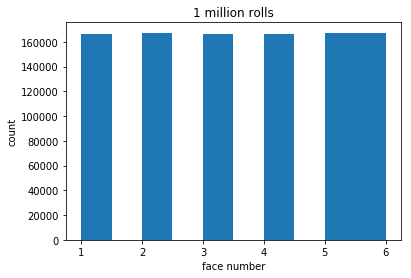

In [19]:
plt.title("1 million rolls")
plt.xlabel("face number")
plt.ylabel("count")
plt.hist(np.random.randint(1,7,1000000))
plt.show()


The results of the roll all seem to be equally likely, 1 million rolls with 6 possible outcomes is 

In [20]:
print(f"{1000000/6:.8}")


166666.67


What if you extend the number of throws to its limit so that the 'sample' extends to the total population. Then you would get a probability distribution, in particular you would get a Uniform distribution over the interval 1 to 6. Values between 1 and 6 would each have the same probability (1/6th) of being face up when rolled. 

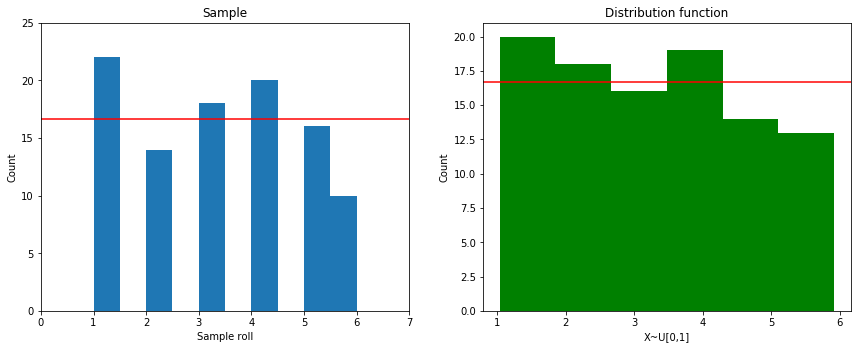

In [21]:
p=100/6
plt.subplot(121)
plt.xlabel("Sample roll")
plt.ylabel('Count')
plt.title("Sample")
plt.axis([0, 7, 0, 25]) # x_start, x_end, y_start, y_end
sample = np.random.randint(1,7,100) # You are generating 100 points between 1 and 6.
plt.axhline(y=p, color='r')
plt.hist(sample)

plt.subplot(122)
plt.title("Distribution function")
plt.ylabel('Count')
plt.xlabel('X~U[0,1]')
plt.axhline(y=p, color='r')
updf = np.random.uniform(1,6,100)
count, bins, ignored = plt.hist(updf, 6, facecolor='green') 
plt.subplots_adjust(bottom=1.0, right=2.0, top=2.0)


Probability distributions have different 'shapes'.  

## What are seeds and how are they involved in generating pseudorandom numbers. 

##  The use of seeds in generating pseudorandom numbers

## Random generator

Random numbers are difficult to generate. Typically when true random numbers are requied some random natural process is used such as radioactive decay levels. Computational random number generation is not truely random. Algorithms can produce long sequences of random looking data but which in reality are completely deterministic once a key value or a seed is known [](https://en.wikipedia.org/wiki/Random_number_generation#%22True%22_vs._pseudo-random_numbers). 

Numpy.random contains four functions involved with the generation of random data from a specified range or given population, RandomState, Seen, get_state and set_state. As noted before 'random' in this sence means pseudo random. Numpy.random uses the pseudo random number generator (PSNG) algorithm named the 'Mersenne Twister'. This is a widely used computer algorithm that is suitable for most random number generaton needs. A PSNG requires a seed as a starting point in the random  sequence. Once a seed is defined, the random sequence it generates can be predicted [](Vo. T.H et al., 2017). If no seed is given then Numpy picks a 'random' one based on either the computers internal clock settings or on the computers own random number generator [](Vo. T.H et al., 2017). 

- RandomState
- Seed
- get_state
- set_state

Simple random data function and and random distrubution functions use the same universal random seed. If you want a different seed for one particular random pattern then you can specify the unique seed with the RandomState function. This creates a local random number gererator that differs from the global one used by the other functions [](McKinny, 2018). 

Numpy.random has a function seed that allows the user to specify the seed and therefore generate a predictible random pattern of data. This is required when testing statistical models that require the same 'random noise' so as not to affect the statistical parameters. 

get_state and set_state are ways of setting a specific random state (set_state) and recalling (get_state)for specific use [](https://stackoverflow.com/questions/48504854/python-random-getstate-and-random-setstate). 

Each of these four functions will be discussed below. 


### RandomState
RandomState(`[seed]`) takes the seed value for the Mersenne Twister as input and outputs the container for the Mersenne Twister pseudo-random number generator [](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html). There is always an underlying RandomState in numpy. All the functions in Numpy.random operate within an global instance of a default RandomState that is not explicitly set. RandomState function is used when the same set of random numbers is required. It allows random numbers from specific instance of the random state to be generated at a local level. 

This means that rather than changing global seed for the Mersenne Twister, a container or instance is created with that specific seed. It is used prior to calling other numpy.random functions. RandomState, like the seed function, allows for functions that call and create random data to return the same random data when called again. RandomState comes with a wide varity of methods to call various probability distrubtions and simple random data function. 

Generally RandomState is prefered over seed as if seed is used all instances of random numbers called within the session will be affected but in RandomState only the instance where it is used with the random method is affected. One thing that I'm not sure off is why RandomState shows different values when called agrepeatedly run but subesquent runs s 

----delete----

Container for the Mersenne Twister pseudo-random number generator.

RandomState exposes a number of methods for generating random numbers drawn from a variety of probability distributions. In addition to the distribution-specific arguments, each method takes a keyword argument size that defaults to None. If size is None, then a single value is generated and returned. If size is an integer, then a 1-D array filled with generated values is returned. If size is a tuple, then an array with that shape is filled and returned.

Compatibility Guarantee A fixed seed and a fixed series of calls to ‘RandomState’ methods using the same parameters will always produce the same results up to roundoff error except when the values were incorrect. Incorrect values will be fixed and the NumPy version in which the fix was made will be noted in the relevant docstring. Extension of existing parameter ranges and the addition of new parameters is allowed as long the previous behavior remains unchanged.
Parameters:	

seed : {None, int, array_like}, optional

    Random seed used to initialize the pseudo-random number generator. Can be any integer between 0 and 2**32 - 1 inclusive, an array (or other sequence) of such integers, or None (the default). If seed is None, then RandomState will try to read data from /dev/urandom (or the Windows analogue) if available or seed from the clock otherwise.

--- end delete ----

--- useful links and things to check ---
https://stackoverflow.com/questions/5836335/consistently-create-same-random-numpy-array

https://stackoverflow.com/questions/32462273/how-to-use-random-randomstate

How does randomstate differ from seed? seed uses the functions of numpy.random i.e. the simple random data, permutation and distribution functions mentioned above, whereas RandomSeed uses a wide varitey of methods that are similar to numpy.random's global functions but local to just the RandomState function. 




In [ ]:
'''
# generate a random number with seed 5
seed = 5
np.random.seed(seed)
print(np.random.rand())
# output is always 0.22199317108973948

#This uses the global rand function and the seed affects all random functions within numpy.random for example 

print(np.random.randint(10)) # picks a random integer between [0, 10) - its always 6 with a seed of 5 a different simple random function than the one rand used above
# This will always be 6 when the seed is 5


#another way to achive the same result without affecting other the randomness of other numpy functions is to use RandomState
# set the state
rs = np.random.RandomState(seed)
# call the method
print(rs.rand())
# This will be 0.8928601514360016 
# however the other global function will not be affected by the RandomState's seed value and will remain at the previously 5 seeded value of 6
print(np.random.randint(10))
#reset random seed

# when the above code is run but the seed value is changed

# generate a random number with seed 5
seed = 50
np.random.seed(seed)
print(np.random.rand())
# output is always 0.22199317108973948

#This uses the global rand function and the seed affects all random functions within numpy.random for example 

print(np.random.randint(10)) # picks a random integer between [0, 10) - its always 6 with a seed of 5 a different simple random function than the one rand used above
# This will always be 6 when the seed is 5


#another way to achive the same result without affecting other the randomness of other numpy functions is to use RandomState
# set the state
rs = np.random.RandomState(seed)
# call the method
print(rs.rand())
# This will be 0.8928601514360016 
# however the other global function will not be affected by the RandomState's seed value and will remain at the previously 5 seeded value of 6
print(np.random.randint(10))
#reset random seed

# this shows that the local call to RandomState's methods same (0.49460164553802144) but the global numpy.random functions have different seeds and hence differnt random values 

# This allows you to have many instances of randomly generated numbers with differnt seeds within the same instance of python running


## still not 100 pc sure whats going on with the numbers

# https://stackoverflow.com/questions/32462273/how-to-use-random-randomstate
'''

In [ ]:
'''
# Create the random state rn with seed 10 
# example adapted from https://www.machinelearningplus.com/python/numpy-tutorial-part1-array-python-examples/
print(np.random.RandomState(None))

print(np.random.RandomState())

print(np.random.RandomState(100))




rn = np.random.RandomState(10)

# Create 20 random numbers between [0,1) with the rand simple random data function
print(rn.rand(20), '\n')
print(rn.rand(20), '\n')
print(rn.rand(20), '\n')
print(rn.rand(20), '\n')
print(rn.rand(20), '\n')
'''


In the above example, the random numbers generated were the same each time as the state was created locally before the simple random data function was called. If the RandomState is not set each time, numpy.random will default back to the global instance and use a random seed. 

In [ ]:
'''
# Create the random state rn with seed 10 
# example adapted from https://www.machinelearningplus.com/python/numpy-tutorial-part1-array-python-examples/

seed = 10
rn = np.random.RandomState() # this array has a RandomState created
print(rn)

rn.get_state


# Create 20 random numbers between [0,1) with the rand simple random data function
#print(rn.rand(20), '\n') # This array has a random
# The numbers will be the same each time once rn's RandomState is created each time
#create the random state
#print(rn.rand(20), '\n')
#create the random state
#print(rn.rand(5), '\n')

'''

### Seed

seed([seed])takes the value selected to seed the Mersenne twister algorithm and its output is not called directly rather it uses the seed input to generate Mersenne twister.[](https://docs.scipy.org/doc/numpy/reference/routines.random.html). It does not return any value as output. If the seed value is not set with this function or the RandomState functon it defaults randomly generated seeds based on the computers internal clock time or internal random generator. Unlike RandomState which only affects the local instance of random method calls, the seed function acts on a global scale and affects all the Numpy.random functions. If the RandomState is not set, it is randomly allocated. Seed is used when the same set of random data is needed. This is used to test models particularly in machine learning. Its input is an integer or 1 dimentional array and if not specified, a random seed is used as mentioned above. [](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html#numpy.random.seed) 


----delete ----
 numpy.random.seed(seed=None)

    Seed the generator.

    This method is called when RandomState is initialized. It can be called again to re-seed the generator. For details, see RandomState.
    Parameters:	

    seed : int or 1-d array_like, optional

        Seed for RandomState. Must be convertible to 32 bit unsigned integers.
        
 ----delete ----


In [ ]:
'''
#changes everytime as seed is randomly set
np.random.seed()
print(np.random.rand(5))

# remains the same as seed is set
np.random.seed(1)

print(np.random.rand(5))
np.random.seed(1)
print(np.random.ranf(5))
'''

Rough work

Container for the Mersenne Twister pseudo-random number generator.

RandomState exposes a number of methods for generating random numbers drawn from a variety of probability distributions. In addition to the distribution-specific arguments, each method takes a keyword argument size that defaults to None. If size is None, then a single value is generated and returned. If size is an integer, then a 1-D array filled with generated values is returned. If size is a tuple, then an array with that shape is filled and returned.

Compatibility Guarantee A fixed seed and a fixed series of calls to ‘RandomState’ methods using the same parameters will always produce the same results up to roundoff error except when the values were incorrect. Incorrect values will be fixed and the NumPy version in which the fix was made will be noted in the relevant docstring. Extension of existing parameter ranges and the addition of new parameters is allowed as long the previous behavior remains unchanged.
Parameters:	

seed : {None, int, array_like}, optional

    Random seed used to initialize the pseudo-random number generator. Can be any integer between 0 and 2**32 - 1 inclusive, an array (or other sequence) of such integers, or None (the default). If seed is None, then RandomState will try to read data from /dev/urandom (or the Windows analogue) if available or seed from the clock otherwise.

Notes

The Python stdlib module “random” also contains a Mersenne Twister pseudo-random number generator with a number of methods that are similar to the ones available in RandomState. RandomState, besides being NumPy-aware, has the advantage that it provides a much larger number of probability distributions to choose from. 



if RandomState is not used then any random numbers generate may differ the next time they are called as they are been seeded from a difference instance of RandomState

If you use the functions in the numpy.random namespace, you will not get consistent pseudorandom numbers because they are pulling from a different RandomState instance than the one you just created.




Random generator
RandomState([seed]) 	Container for the Mersenne Twister pseudo-random number generator.
seed([seed]) 	Seed the generator.
get_state() 	Return a tuple representing the internal state of the generator.
set_state(state) 	Set the internal state of the generator from a tuple.

### get_state

get_state has no input and returns a tuple representing the internal state of the generator [](https://docs.scipy.org/doc/numpy/reference/routines.random.html). It outputs 5 items namely a string 'MT19937' which denotes the (M)ersenne (T)wister 19937 generator. This algorithm as 2<sup>199937</sup> - 1 states [](https://stackoverflow.com/questions/32172054/how-can-i-retrieve-the-current-seed-of-numpys-random-number-generator); The second output item is an array of 624 unsigned 32 bit integer keys. 2<642`*`32> > 2<sup>199937</sup> - 1 hence there is enough bits to represent all the internal states; The third output is a ....; The fourth and fifth output refers to generator states for the standard normal varibale [](https://stackoverflow.com/questions/44313620/converting-to-and-from-numpys-np-random-randomstate-and-pythons-random-random). The Box-Muller transformation is used by Numpy which creates pairs of these variables, one for immediate use and one stored for later use. [](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform). I dont know want the 10 in the third output refers to, but I speculate its something to do with position. 


e last two entries there refer to the state of the generator for standard normal deviates: NumPy uses the Box–Muller transform, which generates these deviates in pairs. So the first call to the gaussian generator produces two values, returns the first, and then stores the second away for later use. The second call then retrieves that second value. Thus we have extra state here that it's necessary to store and retrieve.



postive integer 


, a specific 624 element array
get_state() 	Return a tuple representing the internal state of the generator.

 numpy.random.get_state()¶

    Return a tuple representing the internal state of the generator.

    For more details, see set_state.
    Returns:	

    out : tuple(str, ndarray of 624 uints, int, int, float)

        The returned tuple has the following items:

            the string ‘MT19937’.
            a 1-D array of 624 unsigned integer keys.
            an integer pos.
            an integer has_gauss.
            a float cached_gaussian.



In [ ]:
#print(np.random.get_state())

# adapted from https://stackoverflow.com/questions/45190558/direct-way-to-access-numpy-randomstate-object/45190832#45190832

state = np.random.get_state()
np.random.rand()
print(state)

#print(np.random.set_state(state))

np.random.rand()

#print(state[0]) # the algorithm used MT (2**19937) - 1 
#print(state[1]) # used in representing the internal states
print(state[2]) # ??? is this the state number?? it goes up in 4's every time its executed some sort of counter - restart python and see if it resets
# it seems to have gone back to 10 - comment out the other random state calls above and see if it goes back to 2
# is it a number that counts the number of times the random state is called in a particular session? no that didn't do anything - turn off and one jp and see if that does something
print(state[3]) # used in the box muller transformation of the MT
print(state[4]) # used in the box muller transformation of the MT


# Reference

Idris, I. (2015). NumPy: Beginner's Guide - Third Edition. 3rd ed. BIRMINGHAM - MUMBAI: Packt Publishing. 

McKinney, W. (2018). Python for data analysis. Beijing [i 4 pozostałe]: O'Reilly.

Docs.scipy.org. (2018). Random sampling (numpy.random) — NumPy v1.15 Manual. [online] Available at: https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html [Accessed 20 Oct. 2018].

Vo. T.H, P., Czygan, M., Kumar, A. and Raman, K. (2017). Python. Birmingham: Packt Publishing.

McLeod, S. (2018). Sampling Methods | Simply Psychology. [online] Simplypsychology.org. Available at: https://www.simplypsychology.org/sampling.html [Accessed 20 Oct. 2018].

En.wikipedia.org. (2018). Simple random sample. [online] Available at: https://en.wikipedia.org/wiki/Simple_random_sample [Accessed 20 Oct. 2018].

Mehta, H. (2015). Mastering Python scientific computing. 1st ed. Birmingham: Packt Publishing.